In [74]:
# 1.Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# 2.loading CIFAR10
cifar = keras.datasets.cifar10.load_data()

In [76]:
# 3.train test split
(X_train,y_train),(X_test,y_test) = cifar

In [77]:
# 4.Checking Shapes of X_train and X_test
X_train.shape

(50000, 32, 32, 3)

Total Samples are 50000 each of the sample contain 32x32 frame and have 3 as Red Green Blue

In [78]:
X_test.shape

(10000, 32, 32, 3)

In [79]:
# 5. Scaling or Reshaping y_train and y_test :  as we know that the y_train is 2d array and we dont need it so for better predicitons we will reshape the y_train and y_test both
# In simple language we called it Flattening the y
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

1. reshape(-1,)
1. -1 = if you want to keep the value of samples to be tested or to be trained will be as it is.
2. , = this qoma will make the 32x32 as a flatten

In [84]:
# 6. Now scale or reshape X_train,X_test
X_train = X_train/255
X_test = X_test/255


In [86]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [67]:
# 7. Difining the classes as defined in the Cifar10 Image
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

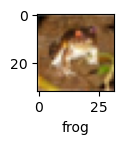

In [68]:
def plot_samples(X,y,index):
    plt.figure(figsize=(5,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

 ### 8.1 Simple Iamge to understand how the convolutional Neural Network is builded in Image
![](cnn.png)


Explaining the model.sequential
1. filters -> Total number of features you want to detect from input image.You already defined filters but remember that filters are stored in the form of matrix.
   ex : filter = 32
2. kernel_size -> each single feature's size
   ex : kernel_size = (3,3) that means 3x3 matric a single filter or feature

In [101]:
# 8.2 Lets build CNN layers now.
cnn = models.Sequential([
    # 1. Make CNN layers
    # as it is shown in image we describes conclutional with relu
        layers.Conv2D(filters = 32 , kernel_size=(3,3),activation='relu',input_shape=(32,32,3)), #extracting feature
        layers.MaxPooling2D((2,2)), #pooling 

    #Hiddend layers---->>>>
        layers.Conv2D(filters = 64 , kernel_size = (3,3),activation='relu'),#again feature extraction
        layers.MaxPooling2D((2,2)), # again pooling
    # 2. Densed Layer
        # after cnn we build Densed Layers to perform predictions and connecting all neurons
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(10,activation = 'softmax'),
])
#compiling
cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
#fit
cnn.fit(X_train,y_train,epochs = 20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.3760 - loss: 1.7140
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5904 - loss: 1.1657
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6481 - loss: 1.0071
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.6843 - loss: 0.9128
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7086 - loss: 0.8499
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7244 - loss: 0.7901
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7443 - loss: 0.7398
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7561 - loss: 0.7011
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.7741 - loss: 0.6557
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7817 - loss: 0.6215
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7965 - loss: 0.5874
Epoch 12

In [103]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6881 - loss: 1.2025


[1.2294563055038452, 0.6793000102043152]

# Great!!
### Now lets check predictions using our defined model

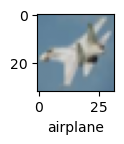

In [124]:
# First lets plot any image
plot_samples(X_test,y_test,10)

In [116]:
y_predicted = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [125]:
#Then show me which ones values is maximum in 1rst index
np.argmax(y_predicted[10])

0

In [126]:
# If you want to see What is at 1rst index 
classes[0]

'airplane'

In [128]:
cnn.save('cifar10.h5')